# Data Science Playground (in Python)

**NOTE: this is an early work in progress. Check back shortly for new additions.**
 

## Introduction 

As I work through the Python DataCamp, this notebook will become my go-to location for writing up disparate snippets of code that I find useful and interesting but don't yet have a permanent home for in one of [my other data-science-tool-specific folders]('https://github.com/pmaji/data-science-toolkit'), but once I have finished the coursework and have had time to give the organization of this document more thought, many sections contained herein will likely be expanded on and included in other sections of this repository. Given the nature of this document, this code will likely not be as well-commented or generally understandable as that contained in my other vignettes, but this document is mostly my scratchpaper, so that is to be expected. 

### Setup 

To enable toggle-able table of contents (with button to enable / disable), check out [this link here]('https://github.com/minrk/ipython_extensions') for instructions on how to get set up. 

In [18]:
# key libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# setting the seed
np.random.seed(123)

In [19]:
# cd to correct directory 
%cd '/Users/pauljeffries/Desktop/personal/personal_code/data_science_toolkit' 
# print working directory just be sure
%pwd  

/Users/pauljeffries/Desktop/personal/personal_code/data_science_toolkit


'/Users/pauljeffries/Desktop/personal/personal_code/data_science_toolkit'

## Simple Pseudo-Random Number Generator 

The simple function below makes use of seed-based pseudo-random numbers and conditional logic to choose one of five options, each with 1/5 probability. The specific use case targeted below is a tool to pick what type of show / movie to watch, given 5 options. 

In [20]:
def make_random_choice(random_seed=777):
    
    # gets random float between 0 & 100
    rand_float = np.random.uniform(0, 100)
    
    # prints choice based on result of random number
    # each choice below has 1/5 chance of being selected
    if rand_float <= 20:
        print("Your random number was " + str(rand_float) + 
              " and the result is: " + "baseball game")
    elif rand_float <= 40:
        print("Your random number was " + str(rand_float) +  
              " and the result is: " + "crime show")
    elif rand_float <= 60:
        print("Your random number was " + str(rand_float) +  
              " and the result is: " + "action movie")
    elif rand_float <= 80:
        print("Your random number was " + str(rand_float) +  
              " and the result is: " + "scary movie")
    else:
        print("Your random number was " + str(rand_float) +  
              " and the result is: " + "other movie")
        
make_random_choice()

Your random number was 69.64691855978616 and the result is: scary movie


## Random Walk Simulation

The problem being explored below is essentially a random walk problem. We are attempting to figure out the probability that we would end up passing a certain floor while playing a dice game in a large building. This dice game has a couple of rules that are seen in the code below, which include:

- If you role a 1 or a 2 you go down a level.
- If you role a 3-5 you go up a level.
- If you role a 6 you role again and go up the # of levels rolled.
- You can't go below step 0. 
- There's a 0.1% chance you fall all the way down the stairs each time you roll.
- Bet to get the odds of is that you'll be at or above step 60 after 100 throws. 

Note: the first chunk of code below throws an error caused by a [deprecation warning from numpy that is of no consequence](https://stackoverflow.com/questions/48687375/deprecation-error-in-sklearn-about-empty-array-without-any-empty-array-in-my-cod) and will be fixed in a future releae (hopefully soon). 

In [21]:
# start by initializing an empty list to hold the running results
# each time we complete one simulation of 100 throws, we add an observation to all_walks
all_walks = []

# building the iterator 
# we're going to run this 150 times
for i in range(150) :
    # initialize the random walk list starting at step (aka floor) 0
    random_walk = [0]
    # build iterator to simulate 100 dice-throws
    for x in range(100) :
        # looks at the most recent entry in random_walk to get current step
        step = random_walk[-1]
        # gets the result of simulated die-roll for this iteration
        # can take any integer value from 1-6
        dice = np.random.randint(1,7)
        # control logic based on result of die-roll to get step result
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        # Implement clumsiness
        if np.random.rand(0,1) <= 0.001 :
            step = 0
            
        # appends the step result from die roll to random_walk list
        random_walk.append(step)
    # after 100 iterations, appends the walk results to all_walks
    all_walks.append(random_walk)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)
# takes a look at the resulting array (like head for np arrays)
np_aw.view()

/Users/pauljeffries/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


array([[ 0,  1,  2, ..., 58, 59, 60],
       [ 0,  4,  3, ..., 70, 71, 73],
       [ 0,  2,  1, ..., 85, 84, 83],
       ...,
       [ 0,  1,  2, ..., 79, 80, 79],
       [ 0,  1,  2, ..., 92, 93, 94],
       [ 0,  0,  0, ..., 67, 68, 69]])

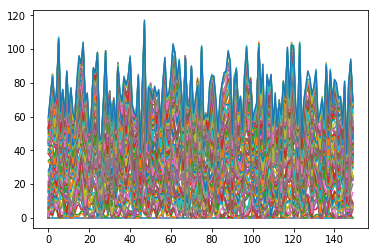

<Figure size 432x288 with 0 Axes>

In [22]:
# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

In [23]:
# Transpose np_aw: np_aw_t
# Now every row in np_all_walks represents the position after 1 throw for the 10 random walks.
np_aw_t = np.transpose(np_aw)
np_aw_t.view()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  4,  2, ...,  1,  1,  0],
       [ 2,  3,  1, ...,  2,  2,  0],
       ...,
       [58, 70, 85, ..., 79, 92, 67],
       [59, 71, 84, ..., 80, 93, 68],
       [60, 73, 83, ..., 79, 94, 69]])

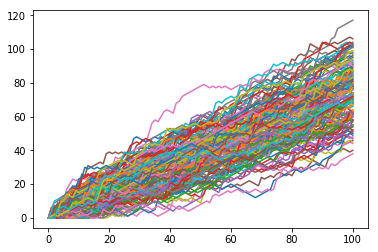

In [24]:
# this post-transpose view of the random walks is thus much easier to interpret
# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

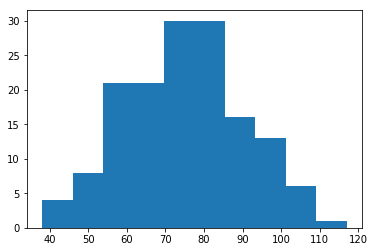

In [25]:
# Now that we have visualized the random walk, we need to see the distros of where they ended
# Select last row from np_aw_t: ends
ends = np_aw_t[-1]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

In [26]:
# finally, to answer the question of the prompt
# what are the odds that I end up at or above 60?
# we can start by looking at the result of all of our ends
print(ends >= 60)
# and then we take the mean which, given 1 = True and False = 0, returns the percent True
np.mean(ends >= 60)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True False False  True  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True False  True  True  True  True False
  True  True  True  True False  True  True  True  True  True False  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
 False  True False  True  True  True]


0.84

## Iterators, Generators and List Comprehension

### Reading in Data and Performing Simple Calculation w/ Iterator

One example of how one can use an iterable in order to read in big data chunk by chunk, performing an operation, and avoiding storing the entirety of the data in memory. In the example below, we have a CSV with a couple hundred thousand rows of information, including a categorical variable column--'main_category'. The function below iteratively reads in chunks of the csv, gets the counts of observations that fall into each main category, stores them, and moves on to the next chunk, performing the same operation. The result is an iteratively calculated count of observations by category, without ever having to read the full dataset into memory. 

Picking a chunk-size can be a bit tricky. I don't have the answer as to how to select the optimal chunk size as there doesn't appear to be a hard and fast rule of thumb. That said, you don't want to go to big such that you can't read in the first chunk (defeating the purpose of chunking), but you don't want to go so small that the [io costs makes it inefficient]('http://acepor.github.io/2017/08/03/using-chunksize/').

In [27]:
# Define count_entries()
# 3 parameters: the file name, the chunk size, and the column name of interest
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize = c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            # If entry already present in dictionary keys, add 1 to count
            # If entry not present, initialize it at a count of 1
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

# Call count_entries(): result_counts
# From the parameters we can tell we're reading 10,000 lines at a time
result_counts = count_entries(
    csv_file = './hypothesis_tests/data/ks-projects-201801.csv',
    c_size = 10000,
    colname = 'main_category'
)

# Print the resulting counts
print(result_counts)


{'Publishing': 39874, 'Film & Video': 63585, 'Music': 51918, 'Food': 24602, 'Design': 30070, 'Crafts': 8809, 'Games': 35231, 'Comics': 10819, 'Fashion': 22816, 'Theater': 10913, 'Art': 28153, 'Photography': 10779, 'Technology': 32569, 'Dance': 3768, 'Journalism': 4755}


### Reading in Data and Plotting Using Iterators and List Comprehension

The chunk below demonstrates some of the utility of iterators and list comprehension by building a function that reads in a dataset and performs, chunk by chunk, an operation, resulting in the creation of a simple scatterplot. 

Note: part of the function below involves appending to a data frame, which in python isn't best practice because that requires essentially re-writing the dataframe from scratch. That said, this is more demonstrative than it is efficient, so I won't worry about that in this case. 

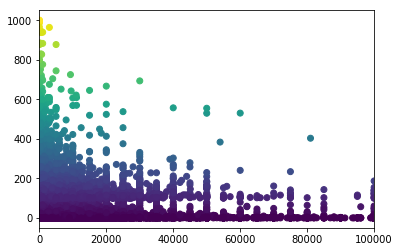

In [28]:
# Define plot_pop()
# Inputs = csv filename, name of variable of interest, value to which it should be filtered, and chunk size
def plot_pop(filename, var_name_of_interest, var_val_of_interest, chunksize = 10000):

    # Initialize reader object: csv_reader
    csv_reader = pd.read_csv(filename, chunksize=chunksize)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()

    # Iterate over each DataFrame chunk
    for chunk_pulled in csv_reader:
        # filter the chunk to only population of interest
        df_filtered = chunk_pulled[chunk_pulled[var_name_of_interest] == var_val_of_interest]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_filtered['usd pledged'],
                    df_filtered['goal'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Percent Funded'
        # Percent Funded is simply: usd (pledged / goal)*100
        # The subsequent line of code throws a chained assignment warning which I don't care about
        pd.options.mode.chained_assignment = None  # default='warn'
        df_filtered['Percent Funded'] = [(tup[0] / tup[1] * 100) for tup in pops_list]
        pd.options.mode.chained_assignment = 'warn'  # now I'll turn warning back on

        # Append DataFrame chunk to data: data
        data = data.append(df_filtered)
    
        # Filtering dataset to reasonable values (arbitrarily for viz.)
        data = data.loc[data['Percent Funded'] <= 1000]
        data['goal'] = pd.to_numeric(data['goal'])
    
    # building the plot itself
    plt.scatter(data['goal'], data['Percent Funded'], c=data['Percent Funded'])
    plt.xlim([0,100000])
    plt.show()

# Call plot_pop filtering to just kickstarters in the Music category
plot_pop(
    filename ='./hypothesis_tests/data/ks-projects-201801.csv',
    var_name_of_interest='main_category',
    var_val_of_interest='Music',
    chunksize = 10000
)

### Quick Plotting Methods

With python, there are many ways to quickly plot data. One way to do this is by making use of the inherent plotting capabilities of the pandas package itself, as shown below.

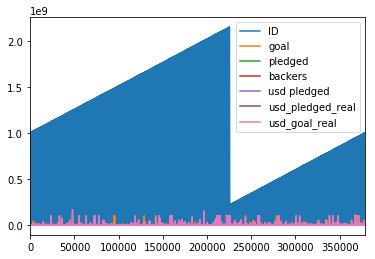

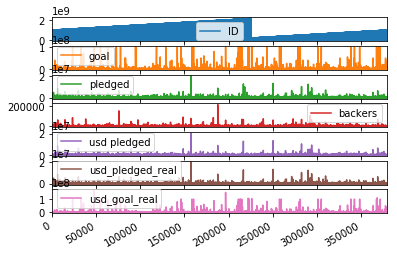

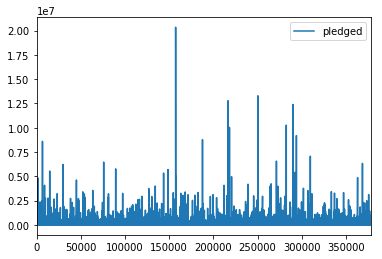

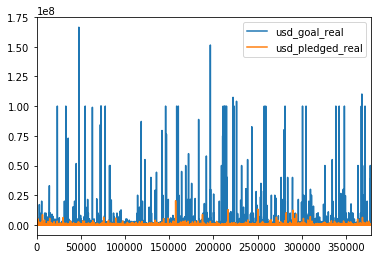

In [29]:
# Import the dataset from csv into a pandas df
projects_df = pd.read_csv('./hypothesis_tests/data/ks-projects-201801.csv')

# Plot all columns on the same axes (default)
projects_df.plot()
plt.show()

# As can be seen from above, the axes are skewed because of scale incongruence between variables.
# We can account for this with subplots, or separate charts--both of which are shown below.
# Plot all columns as subplots
projects_df.plot(subplots=True)
plt.show()

# Plot just a single series based on variable names
column_list1 = ['pledged']
projects_df[column_list1].plot()
plt.show()

# Plot multiple series based on a list of variable names 
column_list2 = ['usd_goal_real','usd_pledged_real']
projects_df[column_list2].plot()
plt.show()